<h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#000;" align="center">SCHOOL DROPOUT IN SOGAMOSO</h1>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 24px; color:#000;" align="center">| EDA Notebook |</p>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 20px; color:#000;" align="center">Correlation One - DS4A</p>
<p style="text-align:center;">In this notebook will be conducted the <b>EDA</b> in order to understand the data and how those data is related with the School Dropout in Sogamoso, Colombia.</p>

## 1. Libraries

In [1]:
# General
import itertools
from datetime import datetime, date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

## Own specific functions 
from functions import *

## 2. Importing files

In [2]:
df_students = pd.read_csv("datasets/df_students.csv")

In [3]:
df_analysis(df_students, key_columns=["PER_ID_ANO"], analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 311866 rows and 35 columns
- Total of NaN values:			 183550
- Percentage of NaN:			 1.68 %
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 83.3+ MB

- The key(s):	 ['PER_ID_ANO'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,ANO,int64,311866,10,0,0.00000,2017.44093,2013.00000,2015.00000,2017.00000,2020.00000,2022.00000,2.88220
1,INSTITUCION,object,311866,76,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,INSTITUCION_ESPECIALIDAD_NO_APLICA,int64,311866,2,0,0.00000,0.38291,0.00000,0.00000,0.00000,1.00000,1.00000,0.48610
32,INSTITUCION_ESPECIALIDAD_INDUSTRIAL,int64,311866,2,0,0.00000,0.63968,0.00000,0.00000,1.00000,1.00000,1.00000,0.48010
31,INSTITUCION_ESPECIALIDAD_COMERCIAL,int64,311866,2,0,0.00000,0.00878,0.00000,0.00000,0.00000,0.00000,1.00000,0.09327
30,INSTITUCION_ESPECIALIDAD_AGROPECUARIO,int64,311866,2,0,0.00000,0.07492,0.00000,0.00000,0.00000,0.00000,1.00000,0.26327
29,INSTITUCION_ESPECIALIDAD_ACADÉMICA,int64,311866,2,0,0.00000,0.90453,0.00000,1.00000,1.00000,1.00000,1.00000,0.29386
28,INSTITUCION_NIVEL_PRIMERA_INFANCIA,int64,311866,2,0,0.00000,0.10307,0.00000,0.00000,0.00000,0.00000,1.00000,0.30405
27,INSTITUCION_NIVEL_PREESCOLAR,int64,311866,2,0,0.00000,0.96091,0.00000,1.00000,1.00000,1.00000,1.00000,0.19382
26,INSTITUCION_NIVEL_MEDIA,int64,311866,2,0,0.00000,0.94293,0.00000,1.00000,1.00000,1.00000,1.00000,0.23198


## 3. Exploratory Data Analysis

### 3.1 Univariate analysis

In [5]:
pd.set_option('display.max_columns', None)
df_students.head()

,ANO,INSTITUCION,PER_ID_ANO,PER_ID,EDAD,GENERO,GRADO_COD,JORNADA,ESTADO,ESTRATO,PAIS_ORIGEN,DISCAPACIDAD,SRPA,INSTITUCION_SECTOR,INSTITUCION_MODELO,INSTITUCION_APOYO_ACADEMICO_ESPECIAL,INSTITUCION_ZONA,INSTITUCION_CARACTER,INSTITUCION_NUMERO_DE_SEDES,INSTITUCION_ESTADO,INSTITUCION_LATITUDE,INSTITUCION_LONGITUD,INSTITUCION_PRESTADOR_DE_SERVICIO,INSTITUCION_TAMAÑO,INSTITUCION_NIVEL_BASICA_PRIMARIA,INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA,INSTITUCION_NIVEL_MEDIA,INSTITUCION_NIVEL_PREESCOLAR,INSTITUCION_NIVEL_PRIMERA_INFANCIA,INSTITUCION_ESPECIALIDAD_ACADÉMICA,INSTITUCION_ESPECIALIDAD_AGROPECUARIO,INSTITUCION_ESPECIALIDAD_COMERCIAL,INSTITUCION_ESPECIALIDAD_INDUSTRIAL,INSTITUCION_ESPECIALIDAD_NO_APLICA,INSTITUCION_ESPECIALIDAD_OTRO
0,2013,INSTITUCION EDUCATIVA LOS LIBERTADORES,373242572013,37324257,24,MASCULINO,8.0,MAÑANA,1,ESTRATO 1,COLOMBIA,NO APLICA,NO APLICA,OFICIAL,EDUCACIÓN TRADICIONAL,NO APLICA,URBANA/RURAL,TÉCNICO/ACADÉMICO,4.0,ANTIGUO-ACTIVO,"5,7244706","-72,9373046",OFICIAL,Mediana,1,1,1,1,0,1,0,0,1,1,1
1,2013,INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTA...,345207452013,34520745,23,MASCULINO,7.0,TARDE,0,ESTRATO 1,COLOMBIA,NO APLICA,NO APLICA,OFICIAL,EDUCACIÓN TRADICIONAL,NO APLICA,URBANA/RURAL,TÉCNICO/ACADÉMICO,8.0,ANTIGUO-ACTIVO,"5,7594304","-72,9053983",OFICIAL,Grande,1,1,1,1,1,1,0,0,1,0,1
2,2013,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,347195952013,34719595,20,FEMENINO,6.0,MAÑANA,0,ESTRATO 2,COLOMBIA,NO APLICA,NO APLICA,OFICIAL,EDUCACIÓN TRADICIONAL,NO APLICA,URBANA/RURAL,TÉCNICO/ACADÉMICO,4.0,ANTIGUO-ACTIVO,"5,7032314","-72,9278083",OFICIAL,Mediana,1,1,1,1,0,1,0,0,1,0,1
3,2013,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,347245102013,34724510,24,FEMENINO,9.0,MAÑANA,0,ESTRATO 2,COLOMBIA,NO APLICA,NO APLICA,OFICIAL,EDUCACIÓN TRADICIONAL,NO APLICA,URBANA/RURAL,TÉCNICO/ACADÉMICO,4.0,ANTIGUO-ACTIVO,"5,7032314","-72,9278083",OFICIAL,Mediana,1,1,1,1,0,1,0,0,1,0,1
4,2013,INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTA...,346674192013,34667419,27,MASCULINO,11.0,TARDE,1,ESTRATO 2,COLOMBIA,NO APLICA,NO APLICA,OFICIAL,EDUCACIÓN TRADICIONAL,NO APLICA,URBANA/RURAL,TÉCNICO/ACADÉMICO,8.0,ANTIGUO-ACTIVO,"5,7594304","-72,9053983",OFICIAL,Grande,1,1,1,1,1,1,0,0,1,0,1


In [92]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311866 entries, 0 to 311865
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ANO                                    311866 non-null  int64  
 1   INSTITUCION                            311866 non-null  object 
 2   PER_ID_ANO                             311866 non-null  int64  
 3   PER_ID                                 311866 non-null  int64  
 4   EDAD                                   311866 non-null  int64  
 5   GENERO                                 311866 non-null  object 
 6   GRADO_COD                              311866 non-null  float64
 7   JORNADA                                311866 non-null  object 
 8   ESTADO                                 311866 non-null  int64  
 9   ESTRATO                                311866 non-null  object 
 10  PAIS_ORIGEN                            311866 non-null  

In [19]:
#Hacer gráfico de barras por año eje x y barras estado
pd.crosstab(index=df_students['ANO'],
            columns=df_students['ESTADO'])

ESTADO,0,1
ANO,,
2013,26559,6260
2014,26177,5460
2015,26028,5740
2016,25831,5783
2017,25530,5244
2018,25283,5818
2019,25111,5860
2020,25575,4027
2021,25644,5257


2022 se debe enviar como output para que la institución realice acciones.

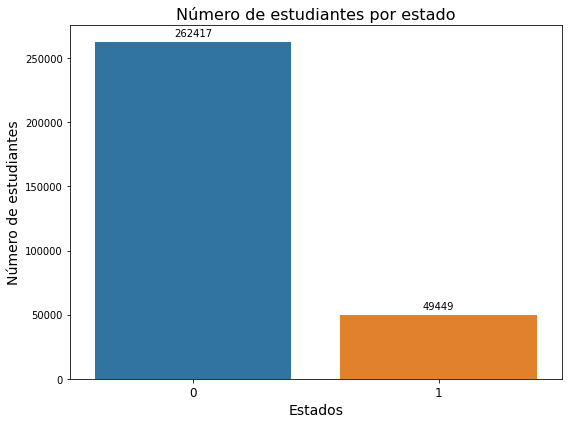

In [145]:
fig, ax1 = plt.subplots(figsize=(8, 6))
plot = sns.barplot(x=df_students["ESTADO"].value_counts(ascending=False).index, 
                   y=df_students["ESTADO"].value_counts(ascending=False))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["ESTADO"].value_counts(ascending=False).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por estado", size=16)
plt.xlabel("Estados", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
    <p><b>Observations</b></p>
    <p>Based on the plot, we can say that we are facing an imbalanced classification problem</p>

</div>

In [16]:
#Hacer gráfico de lineas por año e institución
pd.crosstab(index=df_students['ANO'],
            columns=df_students['INSTITUCION'])#, normalize='index')

INSTITUCION,ANGLO SCHOOL DIVINO SALVADOR,CARITAS FELICES HIGH SCHOOL,CENTRO DE DESARROLLO HUMANO CEDHU,COLEGIO ACUARELA CAMPESTRE,COLEGIO ALEJANDRO DE HUMBOLDT,COLEGIO BASICO PESTALOZZI,COLEGIO CELCO,COLEGIO CELESTIN FREINET,COLEGIO CIUDAD DEL SOL,COLEGIO COMERCIAL ADVENTISTA DE SOGAMOSO CADES,COLEGIO COOPERATIVO REYES PATRIA,COLEGIO DE EDUCACION FORMAL FLEXIBLE SAN MATEO,COLEGIO ECOLOGICO DEL NORTE,COLEGIO IFESCOL BOYACÁ,COLEGIO LA RANA RENE,COLEGIO MILITAR INOCENCIO CHINCA,COLEGIO NUESTRA SEÑORA DEL ROSARIO,COLEGIO PEDAGOGICO DE COLOMBIA,COLEGIO PSICOPEDAGÓGICO DE SOGAMOSO,COLEGIO SAN JOSE,COLEGIO SAN PABLO APOSTOL,COLEGIO SANTA CATALINA,COLEGIO SANTO DOMINGO,COLEGIO SUAMOX,COLEGIO UNICAB VIRTUAL,EL TALLER DE WINNIE POO,FRIEDRICH FROBEL COUNTRY SCHOOL,GIMNASIO MODERNO,GIMNASIO MODERNO MONTESSORI,INSTITUCION EDUCATIVA ANTONIO NARIÑO,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,INSTITUCION EDUCATIVA COLEGIO EMPRESARIAL DE BOYACA,INSTITUCION EDUCATIVA EL CRUCERO,INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES,INSTITUCION EDUCATIVA FRANCISCO DE PAULA SANTANDER,INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO QUIJANO RICO,INSTITUCION EDUCATIVA INTEGRADO JOAQUIN GONZALEZ CAMARGO,INSTITUCION EDUCATIVA LA INDEPENDENCIA,INSTITUCION EDUCATIVA LOS LIBERTADORES,INSTITUCION EDUCATIVA MAGDALENA,INSTITUCION EDUCATIVA NUEVA GRANADA,INSTITUCION EDUCATIVA POLITECNICO ALVARO GONZALEZ SANTANA,INSTITUCION EDUCATIVA RAFAEL GUTIERREZ GIRARDOT,INSTITUCION EDUCATIVA SILVESTRE ARENAS,INSTITUCION EDUCATIVA TECNICA BELLAS ARTES,INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTAVO JIMENEZ,INSTITUCION EDUCATIVA TECNICO SAN MARTIN DE TOURS,INSTITUTO DE EDUCACION FORMAL COMFABOY,INSTITUTO POLITECNICO JOSE CELESTINO MUTIS,INSTITUTO SAN MARTIN,INSTIUCION EDUCATIVA NUESTRA SEÑORA DE MORCA,JARDIN DE BARNEY,JARDIN INFANTIL ECO DE SONRISAS,JARDIN INFANTIL KINDER MARTICA,JARDIN INFANTIL MANITAS CREATIVAS,JARDIN INFANTIL PEQUEÑOS SABIOS,JARDIN INFANTIL PICARDIAS,JARDIN INFANTIL RAYITO DE SOL,JARDÍN INFANTIL PEDAGÓGICO,JUAN PABLO II,LICEO ANGLO AMERICANO,LICEO CAMPESTRE EL MUNDO QUE SOÑE S.A.S,LICEO COLOMBO ANDINO,LICEO COOPERATIVO CAMPESTRE,LICEO DE APRESTAMIENTO ESCOLAR INFANTIL AEI,LICEO EL CASTILLO DEL SABER,LICEO GABRIELA MISTRAL,LICEO INFANTIL IRACA,LICEO INFANTIL SAN MIGUEL ARCANGEL,LICEO LA PRESENTACION SOGAMOSO,LICEO PASOS AL FUTURO S.A.S,LICEO PELDAÑOS,LICEO SAN FERNANDO,LICEO SAN NICOLAS DE TOLENTINO,LICEO SANTO ÁNGEL,NIELS BOHR SCHOOL
ANO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013,0,41,608,152,522,75,371,62,454,233,831,49,0,18,82,178,621,4,58,88,62,162,109,113,24,30,102,21,0,74,2409,13,453,1338,773,283,4099,315,2412,1707,169,4266,300,901,888,3183,384,165,120,77,382,86,0,68,15,0,25,1,41,0,160,23,321,414,20,0,69,0,10,1211,0,26,82,376,90,0
2014,0,12,587,103,545,51,404,58,453,226,904,63,0,0,80,140,556,0,53,109,77,156,101,94,42,12,82,1,0,31,2309,10,379,1709,691,269,3748,304,1748,1499,173,4111,281,1190,983,2961,406,244,121,187,388,87,0,50,17,0,16,0,27,0,131,20,310,432,0,0,26,0,6,1221,0,2,78,486,77,0
2015,0,27,486,139,536,87,394,51,477,199,893,25,15,0,88,145,566,0,70,111,117,146,65,103,85,18,114,32,0,107,2211,28,359,1599,830,302,3577,289,1646,1696,172,4089,276,1383,729,3017,318,298,117,193,408,91,0,65,21,0,2,11,44,0,235,19,321,481,29,0,47,0,1,1206,0,29,88,378,67,0
2016,0,41,573,163,586,120,385,73,454,215,904,74,31,0,79,183,595,0,76,111,110,106,35,99,150,19,107,47,27,116,2214,37,344,1648,807,341,3582,271,1825,1571,141,3903,320,1264,504,2981,301,261,117,145,402,94,0,73,24,0,1,2,40,0,273,26,314,500,0,0,47,0,0,1142,0,24,105,421,70,0
2017,0,39,564,178,575,148,403,84,460,224,937,80,26,0,64,161,573,0,84,105,88,87,86,67,254,20,90,25,18,105,2214,56,337,1344,691,316,3575,285,1811,1511,135,3874,310,1187,512,2944,319,277,76,92,338,89,0,66,11,0,0,0,43,0,226,23,311,497,1,0,45,0,1,1113,0,12,91,437,59,0
2018,12,28,564,153,560,166,468,71,449,187,881,109,25,0,51,113,538,0,97,69,79,84,76,81,428,13,87,37,20,69,2106,49,329,1444,687,313,3548

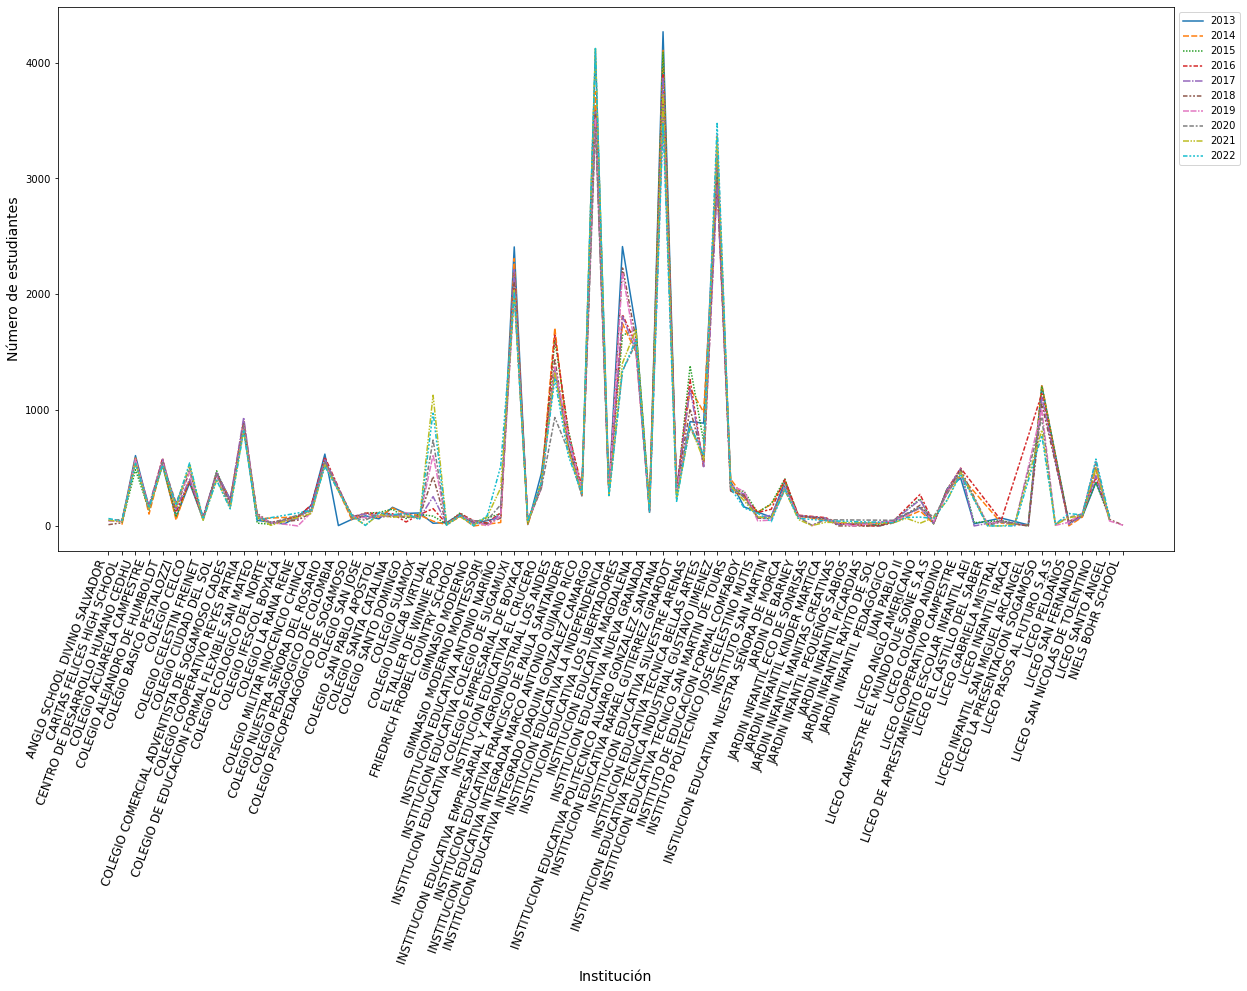

In [85]:
tabla_fin = pd.DataFrame(df_students.groupby(["ANO","INSTITUCION"])['PER_ID'].count())
tabla_fin1 = pd.DataFrame(pd.pivot_table(data=tabla_fin,
                        index=["INSTITUCION"],
                        columns=["ANO"],
                        values='PER_ID'))
tabla_fin1

plt.figure(figsize = (20, 10))
sns.lineplot(data=tabla_fin1)
plt.xticks(tabla_fin1.index,
                     rotation=70, size=12, horizontalalignment="right")
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.xlabel("Institución", size=14)
plt.ylabel("Número de estudiantes", size=14)
sns.set_context ("paper")

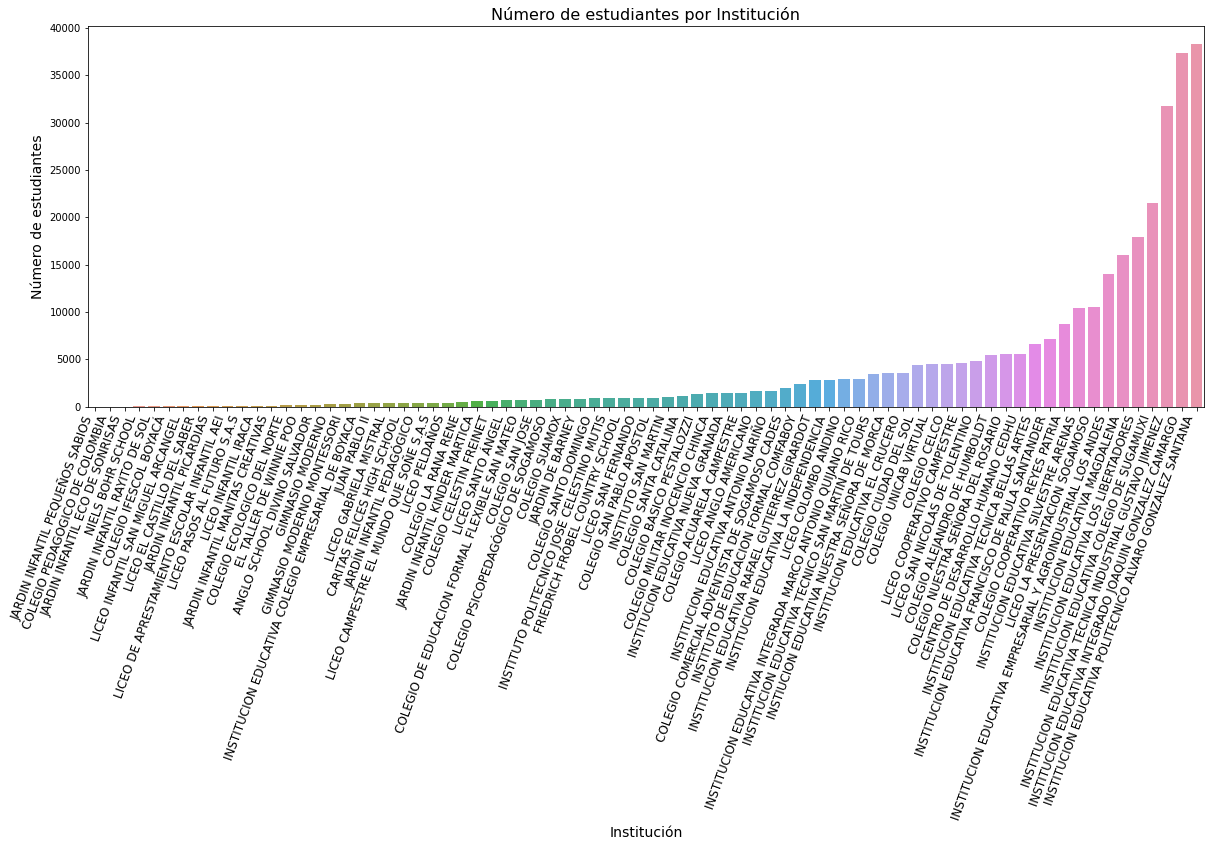

In [5]:
fig, ax1 = plt.subplots(figsize=(20, 7))
plot = sns.barplot(x=df_students["INSTITUCION"].value_counts(ascending=True).index, 
                   y=df_students["INSTITUCION"].value_counts(ascending=True))
plot.set_xticklabels(labels=df_students["INSTITUCION"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Institución", size=16)
plt.xlabel("Institución", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

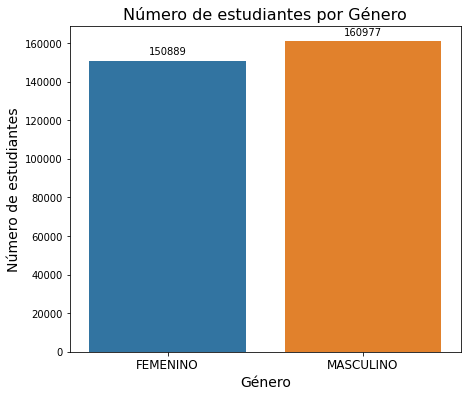

In [144]:
fig, ax1 = plt.subplots(figsize=(7, 6))
plot = sns.barplot(x=df_students["GENERO"].value_counts(ascending=True).index, 
                   y=df_students["GENERO"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["GENERO"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por Género", size=16)
plt.xlabel("Género", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

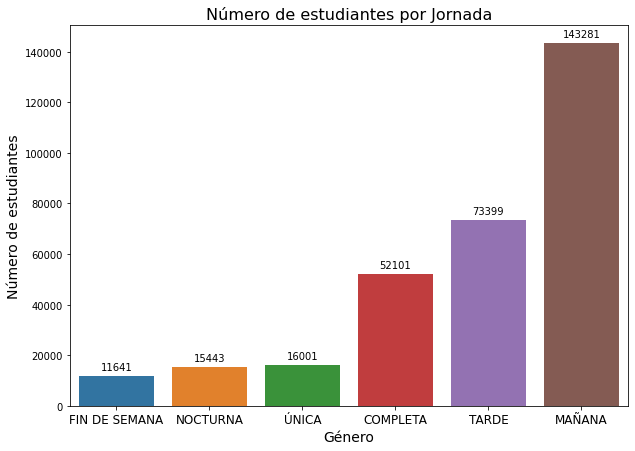

In [143]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["JORNADA"].value_counts(ascending=True).index, 
                   y=df_students["JORNADA"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["JORNADA"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por Jornada", size=16)
plt.xlabel("Género", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

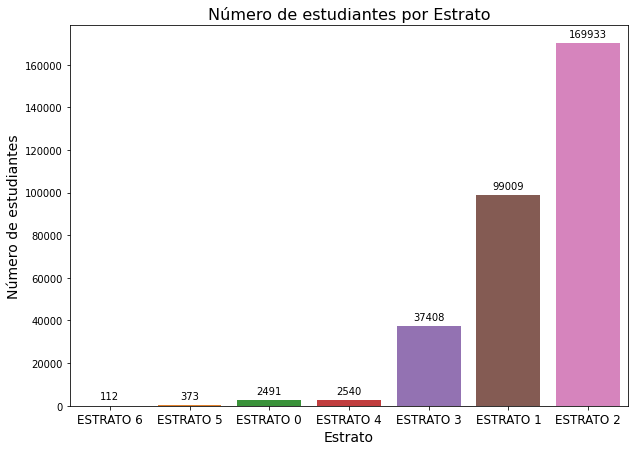

In [142]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["ESTRATO"].value_counts(ascending=True).index, 
                   y=df_students["ESTRATO"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["ESTRATO"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por Estrato", size=16)
plt.xlabel("Estrato", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

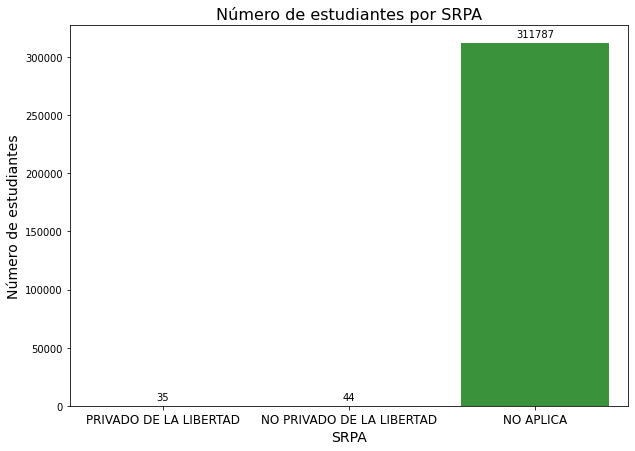

In [135]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["SRPA"].value_counts(ascending=True).index, 
                   y=df_students["SRPA"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["SRPA"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por SRPA", size=16)
plt.xlabel("SRPA", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

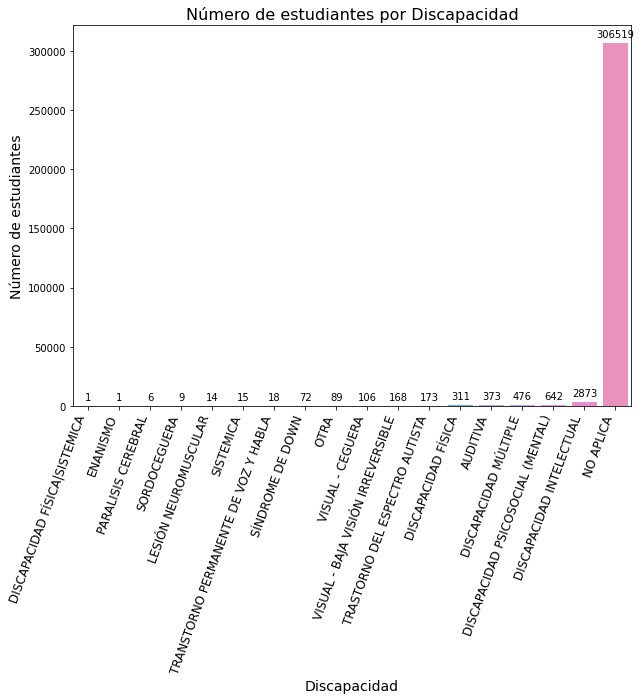

In [110]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["DISCAPACIDAD"].value_counts(ascending=True).index, 
                   y=df_students["DISCAPACIDAD"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["DISCAPACIDAD"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Discapacidad", size=16)
plt.xlabel("Discapacidad", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

Convertir en dicotomica la variable si tiene o no discapacidad.

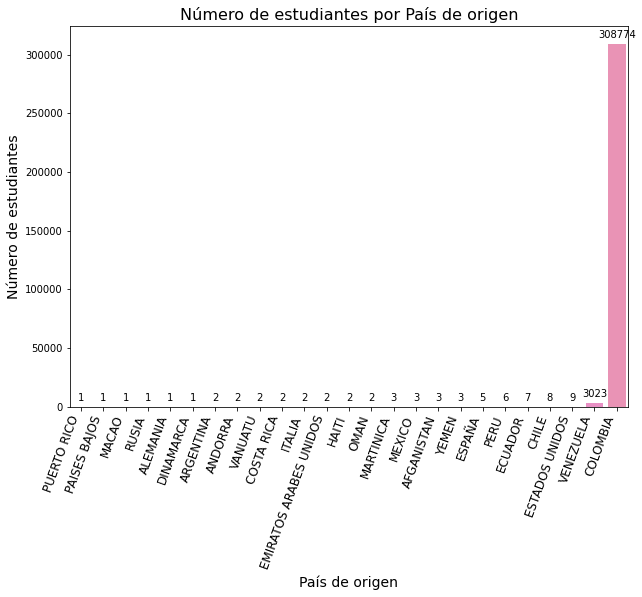

In [111]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["PAIS_ORIGEN"].value_counts(ascending=True).index, 
                   y=df_students["PAIS_ORIGEN"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["PAIS_ORIGEN"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por País de origen", size=16)
plt.xlabel("País de origen", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

Eliminar del estudio el país de origen!

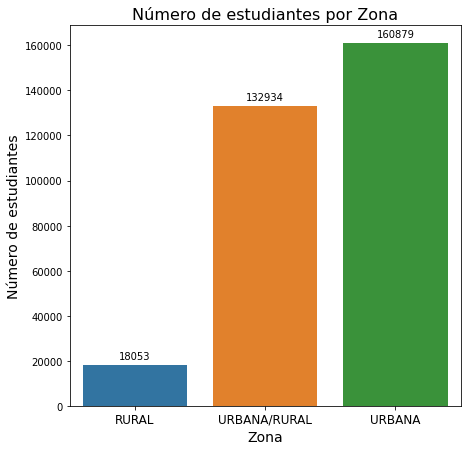

In [136]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students["INSTITUCION_ZONA"].value_counts(ascending=True).index, 
                   y=df_students["INSTITUCION_ZONA"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_ZONA"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por Zona", size=16)
plt.xlabel("Zona", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

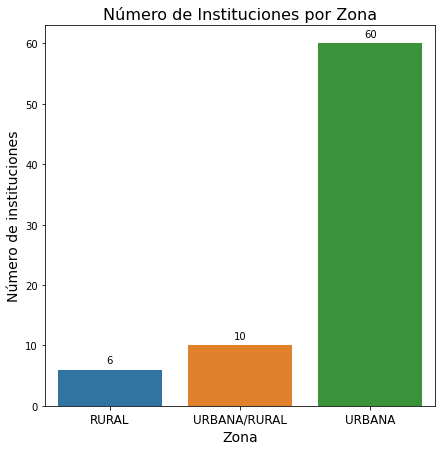

In [137]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students.groupby("INSTITUCION_ZONA")["INSTITUCION"].nunique().sort_values().index, 
                   y=df_students.groupby("INSTITUCION_ZONA")["INSTITUCION"].nunique().sort_values())
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_ZONA"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de Instituciones por Zona", size=16)
plt.xlabel("Zona", size=14)
plt.ylabel("Número de instituciones", size=14)
plt.show()

En promedio en la zona rural se han atendido en promedio 3009 estudiantes, en las instuciones con zonas mixtas en promedio son 13.293 y para las instituciones en zonas urbanas en promedio son 2.681 estudiantes, lo cual demuestra que las instituciones con zonas mixtas tienen más estudiantes que las que pertenecen a una zona y en las de zona rural hay mayor número de estudiantes que en aquellas exclusivas con zona urbana.

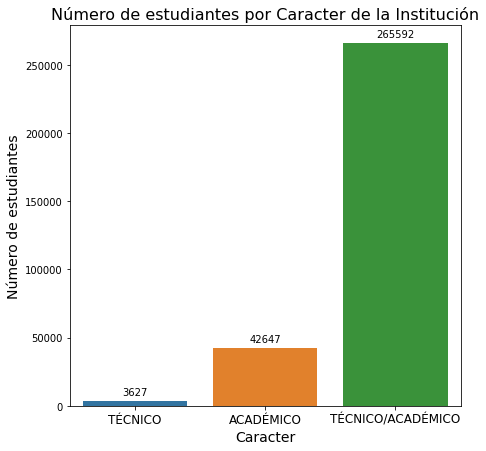

In [138]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True).index, 
                   y=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por Caracter de la Institución", size=16)
plt.xlabel("Caracter", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

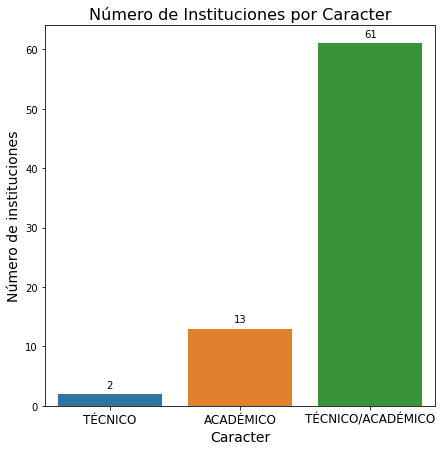

In [139]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students.groupby("INSTITUCION_CARACTER")["INSTITUCION"].nunique().sort_values().index, 
                   y=df_students.groupby("INSTITUCION_CARACTER")["INSTITUCION"].nunique().sort_values())
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de Instituciones por Caracter", size=16)
plt.xlabel("Caracter", size=14)
plt.ylabel("Número de instituciones", size=14)
plt.show()

Hay evidencia de instituciones con doble caracter, adicional al dividir el número de estudiantes por instituciones se evidencia que las instituciones de caracter mixto tiene mayor número de estudiantes y las de caracter técnico el menor número de estudiantes a cargo.

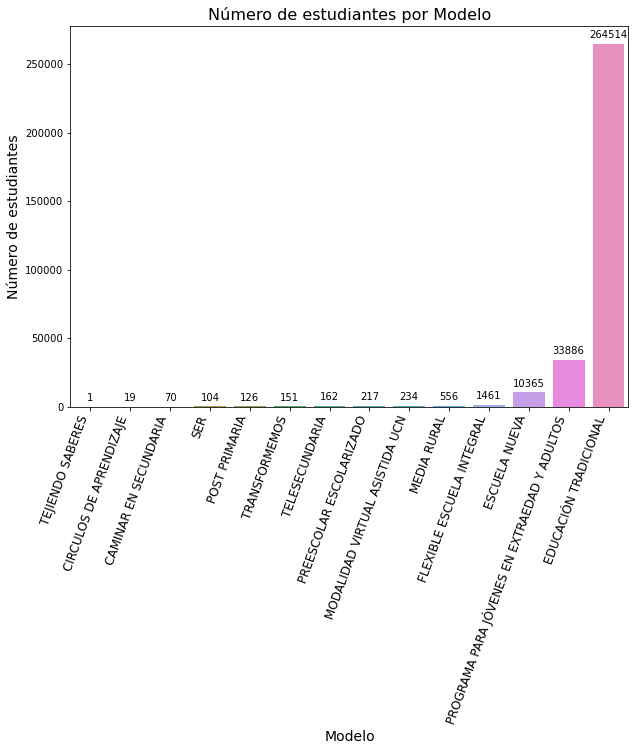

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["INSTITUCION_MODELO"].value_counts(ascending=True).index, 
                   y=df_students["INSTITUCION_MODELO"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_MODELO"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Modelo", size=16)
plt.xlabel("Modelo", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

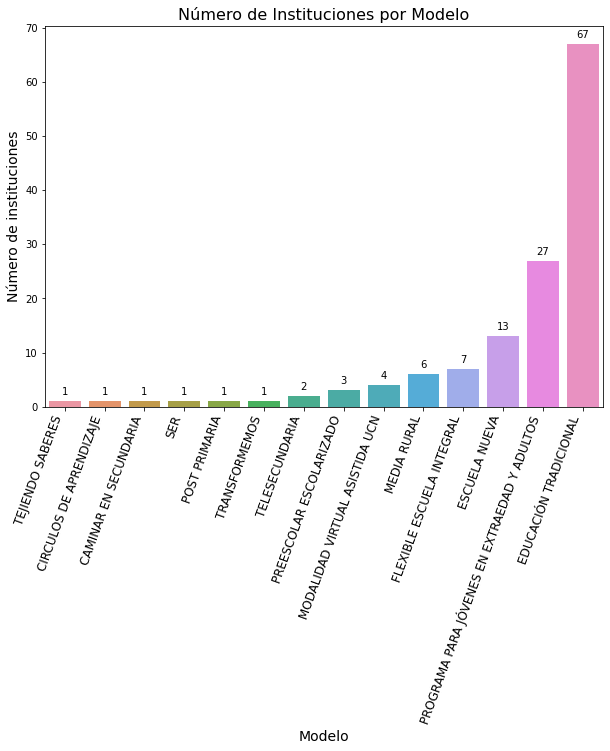

In [141]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students.groupby("INSTITUCION_MODELO")["INSTITUCION"].nunique().sort_values().index, 
                   y=df_students.groupby("INSTITUCION_MODELO")["INSTITUCION"].nunique().sort_values())
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_MODELO"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de Instituciones por Modelo", size=16)
plt.xlabel("Modelo", size=14)
plt.ylabel("Número de instituciones", size=14)
plt.show()

In [ ]:
Hay más instituciones de las que deberia, se están duplicando. La eliminamos?

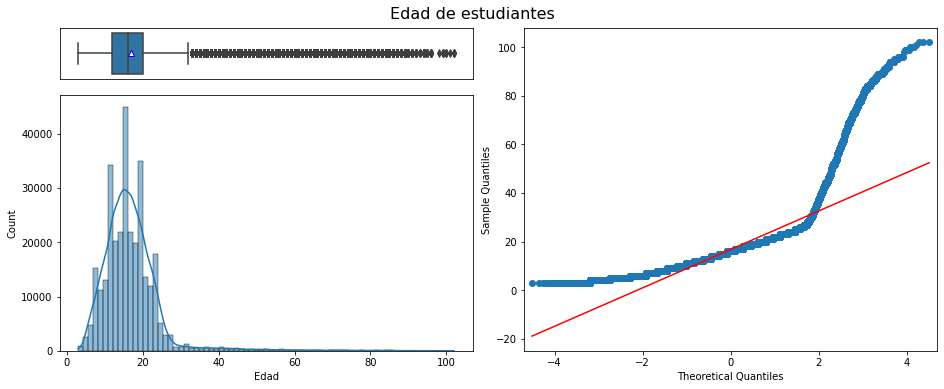

In [21]:
fig = plt.figure(constrained_layout=True, figsize=[13,5])
fig.suptitle("Edad de estudiantes", size=16, y=1.05)
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1], height_ratios=[1, 5])

ax_box = fig.add_subplot(spec[0, 0])
ax_hist = fig.add_subplot(spec[1, 0])
ax_qqplot = fig.add_subplot(spec[:, 1])

# Boxplot
boxplot = sns.boxplot(data=df_students, x=df_students["EDAD"], showmeans=True, ax=ax_box,
                      meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
ax_box.set(xlabel="", xticks=[])
ax_box.set(yticks=[])
boxplot.set_title("")

# Histplot
sns.histplot(data=df_students, x=df_students["EDAD"], bins=75,  kde=True,  ax=ax_hist)
ax_hist.set(xlabel="Edad")

# QQplot
qqplot(df_students["EDAD"], line="s", ax=ax_qqplot)

plt.show()

Convertir esta variable en categórica

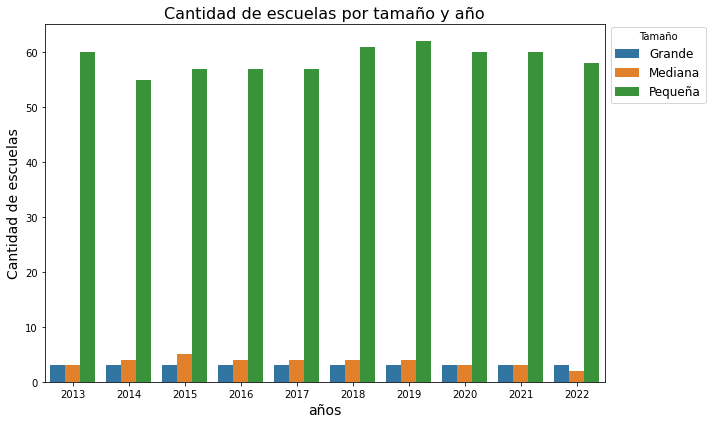

In [101]:
df_temp = pd.DataFrame(df_students.groupby(["ANO", 
                                            "INSTITUCION_TAMAÑO"])["INSTITUCION"].nunique()).reset_index()

df_temp.rename(columns={"ANO" : "Año",
                        "INSTITUCION_TAMAÑO" : "Tamaño",
                        "INSTITUCION" : "Total"}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="Año", y="Total", hue="Tamaño", data=df_temp)
plt.title("Cantidad de escuelas por tamaño y año", fontsize=16)
plt.xlabel("años", size=14)
plt.ylabel("Cantidad de escuelas", size=14)
plt.legend(bbox_to_anchor=(1, 1.01), loc="upper left", prop={"size": 12},
           title="Tamaño")
plt.tight_layout()
plt.show()

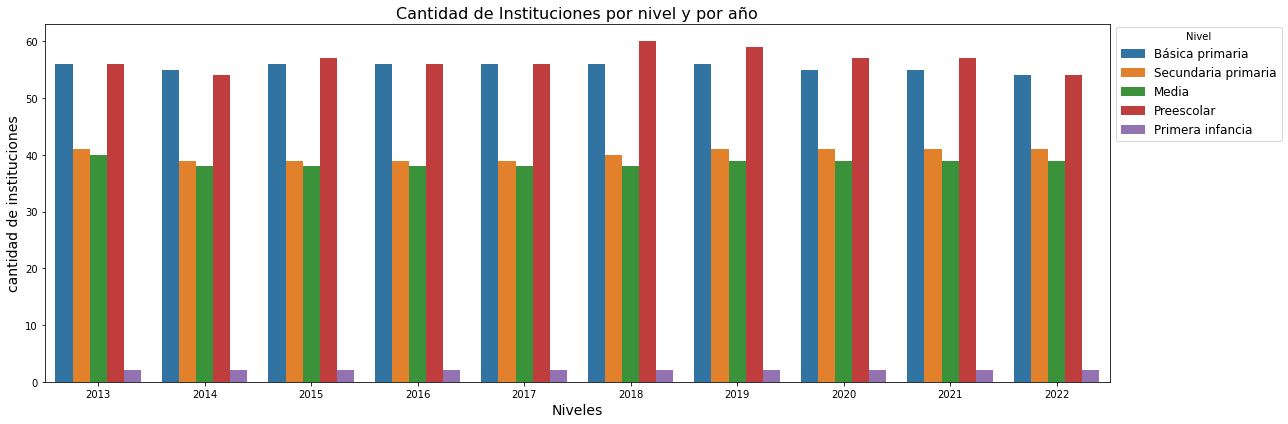

In [246]:
NIVEL = [
    "INSTITUCION_NIVEL_BASICA_PRIMARIA", "INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA", 
    "INSTITUCION_NIVEL_MEDIA", "INSTITUCION_NIVEL_PREESCOLAR", 
    "INSTITUCION_NIVEL_PRIMERA_INFANCIA",
]

df_schools = pd.DataFrame()

for column in NIVEL:

    # making a bool series
    bool_series = df_students[["ANO", "INSTITUCION", column]].duplicated(keep="last")

    # passing NOT of bool series to see unique values only
    df_temp = df_students[~bool_series].copy()

    # Grouping and counting by number of school by year and variable
    df_temp = df_temp.groupby("ANO").agg({ column : "sum" }).reset_index()

    # df_schools = df_schools.merge(df_temp, on="ANO", how="left")
    df_schools = pd.concat([df_schools, df_temp], axis=1)
    
df_schools = df_schools.loc[:, ~df_schools.columns.duplicated()].copy()

df_schools = df_schools.melt(id_vars="ANO").rename(columns=str.title)

LABELS = ["Básica primaria", "Secundaria primaria",
          "Media", "Preescolar", "Primera infancia"]

plt.figure(figsize=(18, 6))

ax = sns.barplot(x="Ano", y="Value", hue="Variable", 
                 data=df_schools)

h, l = ax.get_legend_handles_labels()
ax.legend(h, LABELS, bbox_to_anchor=(1, 1.01), 
          loc="upper left", prop={"size": 12},
          title="Nivel")
plt.title("Cantidad de Instituciones por nivel y por año", fontsize=16)
plt.xlabel("Niveles", size=14)
plt.ylabel("cantidad de instituciones", size=14)
plt.tight_layout()
plt.show()

In [248]:
df_students.columns

Index(['ANO', 'INSTITUCION', 'PER_ID_ANO', 'PER_ID', 'EDAD', 'GENERO',
       'GRADO_COD', 'JORNADA', 'ESTADO', 'ESTRATO', 'PAIS_ORIGEN',
       'DISCAPACIDAD', 'SRPA', 'INSTITUCION_SECTOR', 'INSTITUCION_MODELO',
       'INSTITUCION_APOYO_ACADEMICO_ESPECIAL', 'INSTITUCION_ZONA',
       'INSTITUCION_CARACTER', 'INSTITUCION_NUMERO_DE_SEDES',
       'INSTITUCION_ESTADO', 'INSTITUCION_LATITUDE', 'INSTITUCION_LONGITUD',
       'INSTITUCION_PRESTADOR_DE_SERVICIO', 'INSTITUCION_TAMAÑO',
       'INSTITUCION_NIVEL_BASICA_PRIMARIA',
       'INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA', 'INSTITUCION_NIVEL_MEDIA',
       'INSTITUCION_NIVEL_PREESCOLAR', 'INSTITUCION_NIVEL_PRIMERA_INFANCIA',
       'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
       'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
       'INSTITUCION_ESPECIALIDAD_COMERCIAL',
       'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
       'INSTITUCION_ESPECIALIDAD_NO_APLICA', 'INSTITUCION_ESPECIALIDAD_OTRO'],
      dtype='object')

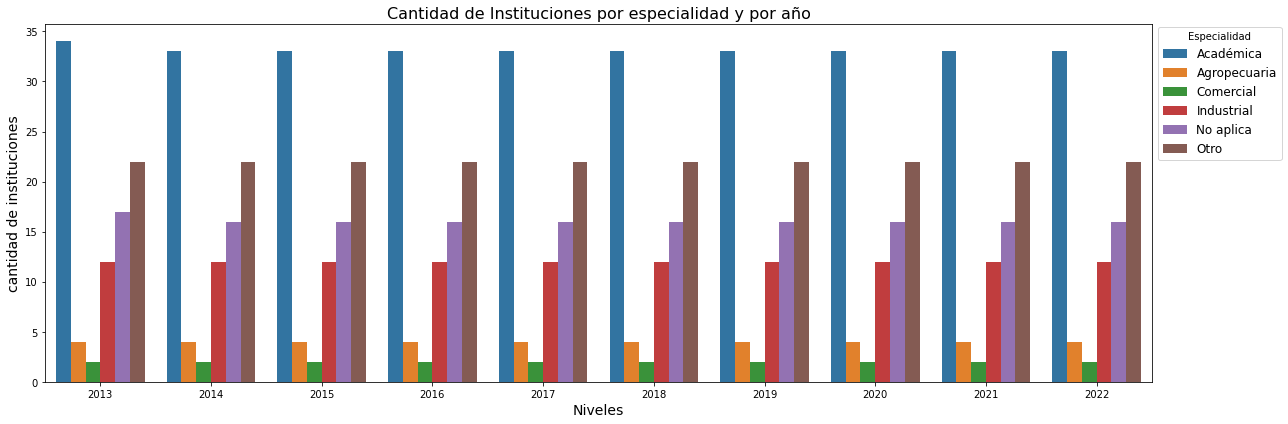

In [251]:
ESPECIALIDAD = [
    "INSTITUCION_ESPECIALIDAD_ACADÉMICA", "INSTITUCION_ESPECIALIDAD_AGROPECUARIO",
    "INSTITUCION_ESPECIALIDAD_COMERCIAL", "INSTITUCION_ESPECIALIDAD_INDUSTRIAL",
    "INSTITUCION_ESPECIALIDAD_NO_APLICA", "INSTITUCION_ESPECIALIDAD_OTRO"
]

df_schools = pd.DataFrame()

for column in ESPECIALIDAD:

    # making a bool series
    bool_series = df_students[["ANO", "INSTITUCION", column]].duplicated(keep="last")

    # passing NOT of bool series to see unique values only
    df_temp = df_students[~bool_series].copy()

    # Grouping and counting by number of school by year and variable
    df_temp = df_temp.groupby("ANO").agg({ column : "sum" }).reset_index()

    # df_schools = df_schools.merge(df_temp, on="ANO", how="left")
    df_schools = pd.concat([df_schools, df_temp], axis=1)
    
df_schools = df_schools.loc[:, ~df_schools.columns.duplicated()].copy()

df_schools = df_schools.melt(id_vars="ANO").rename(columns=str.title)

LABELS = ["Académica", "Agropecuaria", "Comercial",
          "Industrial", "No aplica", "Otro"]

plt.figure(figsize=(18, 6))

ax = sns.barplot(x="Ano", y="Value", hue="Variable", 
                 data=df_schools)

h, l = ax.get_legend_handles_labels()
ax.legend(h, LABELS, bbox_to_anchor=(1, 1.01), 
          loc="upper left", prop={"size": 12},
          title="Especialidad")
plt.title("Cantidad de Instituciones por especialidad y por año", fontsize=16)
plt.xlabel("Niveles", size=14)
plt.ylabel("cantidad de instituciones", size=14)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
    <p><h1>FLAG</h1></p>
</div>

### 3.2 Bivariate analysis

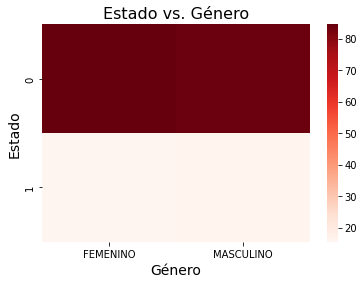

In [252]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["GENERO"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Género", size=16)
plt.xlabel("Género", size=14)
plt.ylabel("Estado", size=14)
plt.show()

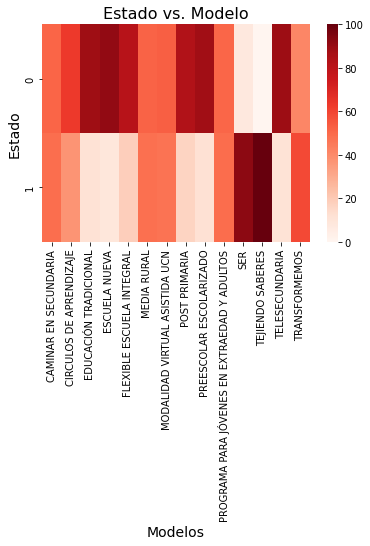

In [254]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION_MODELO"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Modelo", size=16)
plt.xlabel("Modelos", size=14)
plt.ylabel("Estado", size=14)
plt.show()

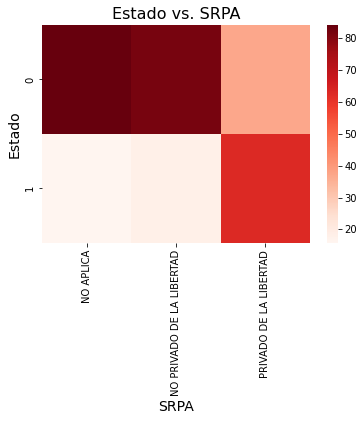

In [255]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["SRPA"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. SRPA", size=16)
plt.xlabel("SRPA", size=14)
plt.ylabel("Estado", size=14)
plt.show()

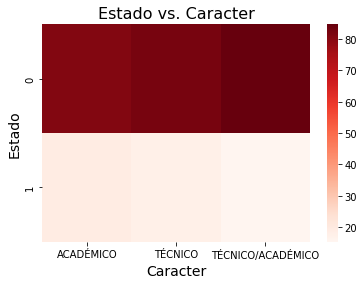

In [256]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION_CARACTER"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Caracter", size=16)
plt.xlabel("Caracter", size=14)
plt.ylabel("Estado", size=14)
plt.show()

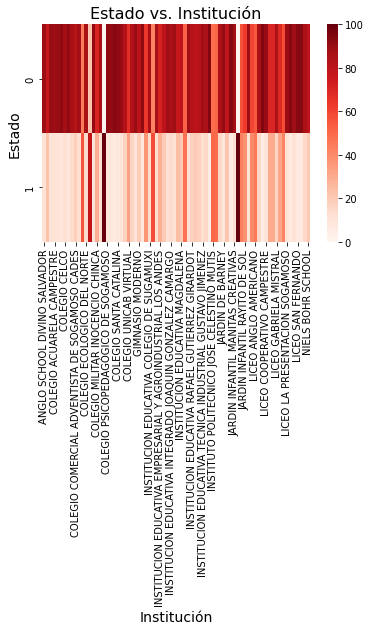

In [257]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Institución", size=16)
plt.xlabel("Institución", size=14)
plt.ylabel("Estado", size=14)
plt.show()

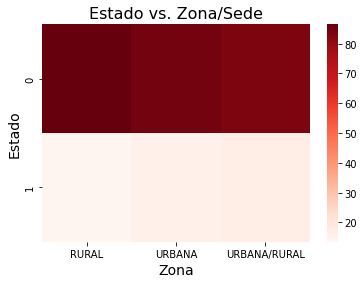

In [258]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION_ZONA"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Zona/Sede", size=16)
plt.xlabel("Zona", size=14)
plt.ylabel("Estado", size=14)
plt.show()

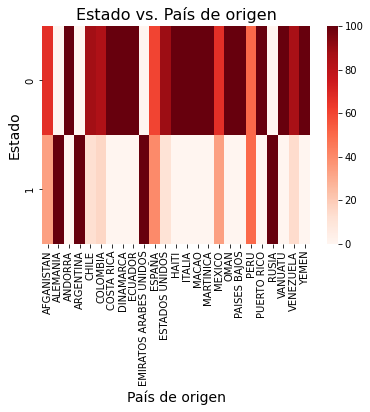

In [260]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["PAIS_ORIGEN"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. País de origen", size=16)
plt.xlabel("País de origen", size=14)
plt.ylabel("Estado", size=14)
plt.show()

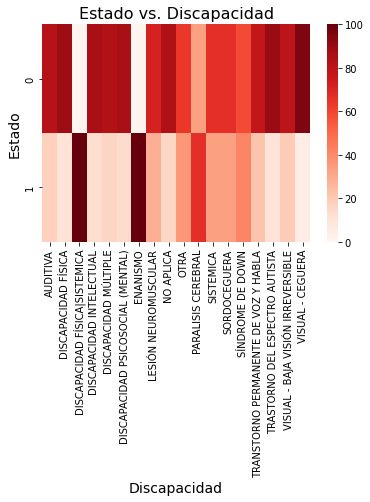

In [259]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["DISCAPACIDAD"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Discapacidad", size=16)
plt.xlabel("Discapacidad", size=14)
plt.ylabel("Estado", size=14)
plt.show()

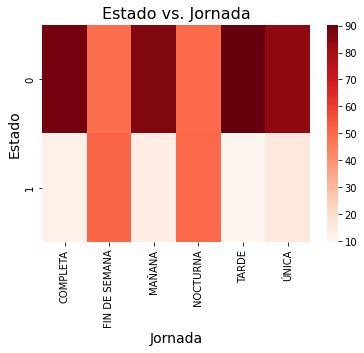

In [261]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["JORNADA"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Jornada", size=16)
plt.xlabel("Jornada", size=14)
plt.ylabel("Estado", size=14)
plt.show()

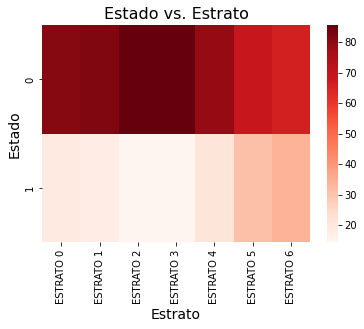

In [262]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["ESTRATO"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Estrato", size=16)
plt.xlabel("Estrato", size=14)
plt.ylabel("Estado", size=14)
plt.show()

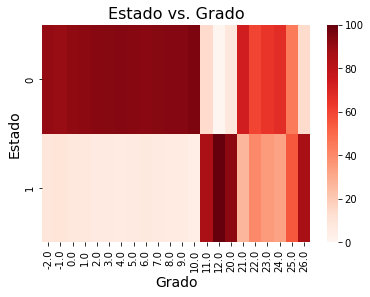

In [21]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["GRADO_COD"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Grado", size=16)
plt.xlabel("Grado", size=14)
plt.ylabel("Estado", size=14)
plt.show()

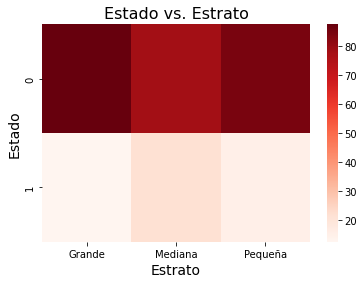

In [264]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION_TAMAÑO"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Estrato", size=16)
plt.xlabel("Estrato", size=14)
plt.ylabel("Estado", size=14)
plt.show()

In [22]:
df_students.columns

Index(['ANO', 'INSTITUCION', 'PER_ID_ANO', 'PER_ID', 'EDAD', 'GENERO',
       'GRADO_COD', 'JORNADA', 'ESTADO', 'ESTRATO', 'PAIS_ORIGEN',
       'DISCAPACIDAD', 'SRPA', 'INSTITUCION_SECTOR', 'INSTITUCION_MODELO',
       'INSTITUCION_APOYO_ACADEMICO_ESPECIAL', 'INSTITUCION_ZONA',
       'INSTITUCION_CARACTER', 'INSTITUCION_NUMERO_DE_SEDES',
       'INSTITUCION_ESTADO', 'INSTITUCION_LATITUDE', 'INSTITUCION_LONGITUD',
       'INSTITUCION_PRESTADOR_DE_SERVICIO', 'INSTITUCION_TAMAÑO',
       'INSTITUCION_NIVEL_BASICA_PRIMARIA',
       'INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA', 'INSTITUCION_NIVEL_MEDIA',
       'INSTITUCION_NIVEL_PREESCOLAR', 'INSTITUCION_NIVEL_PRIMERA_INFANCIA',
       'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
       'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
       'INSTITUCION_ESPECIALIDAD_COMERCIAL',
       'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
       'INSTITUCION_ESPECIALIDAD_NO_APLICA', 'INSTITUCION_ESPECIALIDAD_OTRO'],
      dtype='object')

In [75]:
df_students1=df_students.drop(columns=['ANO','PER_ID_ANO', 'PER_ID','PAIS_ORIGEN','SRPA','INSTITUCION_LATITUDE', 'INSTITUCION_LONGITUD','INSTITUCION_NIVEL_BASICA_PRIMARIA',
       'INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA', 'INSTITUCION_NIVEL_MEDIA',
       'INSTITUCION_NIVEL_PREESCOLAR', 'INSTITUCION_NIVEL_PRIMERA_INFANCIA',
       'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
       'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
       'INSTITUCION_ESPECIALIDAD_COMERCIAL',
       'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
       'INSTITUCION_ESPECIALIDAD_NO_APLICA', 'INSTITUCION_ESPECIALIDAD_OTRO', 'INSTITUCION_ESTADO','DISCAPACIDAD','INSTITUCION_MODELO','INSTITUCION_PRESTADOR_DE_SERVICIO','INSTITUCION_APOYO_ACADEMICO_ESPECIAL'])

In [87]:
df_students['EDAD'].value_counts().sort_values()

101        1
98         1
102        3
100        3
93         4
99         5
96         9
95         9
91        12
92        12
90        14
94        16
88        17
82        23
85        28
87        29
68        32
81        34
89        38
79        40
86        41
80        43
83        45
75        48
77        49
76        55
78        55
64        58
70        60
74        61
84        62
63        64
73        68
72        76
67        77
65        87
71        88
62        95
66        96
61       102
60       105
69       117
57       120
58       123
59       123
55       128
56       131
53       146
54       164
49       191
50       192
51       193
48       198
47       217
3        219
52       227
46       264
45       267
44       305
43       317
41       335
39       345
40       356
36       357
42       363
38       387
37       416
35       419
33       467
34       485
32       573
31       607
30       672
4        721
29       777
28      1095
27      1851

In [ ]:
0-5
6-10
11
12
13
...
20
21-25
26 y más

In [76]:
df_students1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311866 entries, 0 to 311865
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   INSTITUCION                  311866 non-null  object 
 1   EDAD                         311866 non-null  int64  
 2   GENERO                       311866 non-null  object 
 3   GRADO_COD                    311866 non-null  float64
 4   JORNADA                      311866 non-null  object 
 5   ESTADO                       311866 non-null  int64  
 6   ESTRATO                      311866 non-null  object 
 7   INSTITUCION_SECTOR           311866 non-null  object 
 8   INSTITUCION_ZONA             311866 non-null  object 
 9   INSTITUCION_CARACTER         311866 non-null  object 
 10  INSTITUCION_NUMERO_DE_SEDES  311866 non-null  float64
 11  INSTITUCION_TAMAÑO           311866 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 28.6+ MB


In [77]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector

In [78]:
X = df_students1.drop(columns = ['ESTADO'] )
y = df_students1['ESTADO']

numeric_cols = X.select_dtypes(include=['int64']).columns.to_list()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

In [81]:
X_prep.shape

(311866, 105)

In [79]:
X_train_prep = preprocessor.fit_transform(X)

In [80]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
X_prep = preprocessor.fit_transform(X)
X_prep = pd.DataFrame(X_prep, columns=labels)

ValueError: Shape of passed values is (311866, 1), indices imply (311866, 103)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X_prep,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [66]:
from sklearn.linear_model import LogisticRegressionCV
ml=LogisticRegressionCV(solver='liblinear', cv=10, random_state=0,scoring='roc_auc').fit(X_train, y_train)

C:\Users\Nelcy-Aflore\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KeyboardInterrupt: 

In [ ]:
cml = confusion_matrix(y_test, ml.predict(X_test))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cml,cmap ='Pastel1')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cml[i, j], ha='center', va='center', color='black')
plt.show()

In [ ]:
print(classification_report(y_test, ml.predict(X_test)))

In [ ]:
print("Curva ROC - AUC del modelo:")
roc_auc_score(y_test,ml.predict(X_test))